In [13]:
import datetime

Get the current time

In [14]:
def get_time():
    current_time = datetime.datetime.now()

    return [current_time.hour, current_time.minute, current_time.second]

get_time()

[19, 42, 57]

Convert to Fibonary

1,1,2,3,5,8,13,21,34,55

In [15]:
class Graphics:
    def __init__(self):
        self.colour = 'black'
    
    def create_pen(self, r, g, b):
        return (r / 255, g / 255, b / 255)

    def set_font(self, font):
        return

    def set_pen(self, colour):
        self.colour = colour

    def rectangle(self, x, y, width, height):
        rect = plt.Rectangle((x, y), width, height, linewidth=1, edgecolor='black', facecolor=self.colour)
        ax.add_artist(rect)

Draw it up

In [16]:
import sys
sys.path.append('./fibonacci_clock')

In [17]:
import time
from IPython import display
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from fibonacci_clock.draw_utils import *
from fibonacci_clock.fibonacci import *
from fibonacci_clock.borders import *

from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
%matplotlib inline

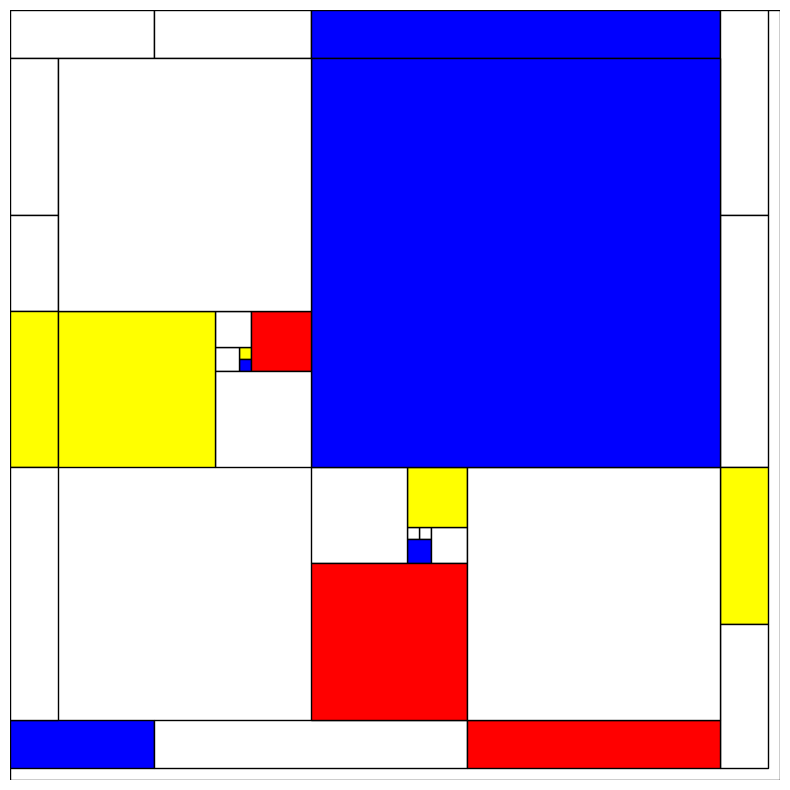

In [22]:
graphics = Graphics()
set_draw_utils(graphics)
loop = False
use_fake_time = False
fake_time = 0

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal', 'box')
ax.axis('off')
# adjust x and y limits to zoom out
ax.set_xlim([0, 64])
ax.set_ylim([0, 64])

ax.invert_yaxis()

offset_x = 4
offset_y = 4

while True:
    # [hour, minute, second] = get_time() if not use_fake_time else [fake_time, fake_time, fake_time]
    [hour, minute, second] = [19, 54, 0]
    draw_square(graphics, 0, 0, 64, 'white')
    draw_borders(graphics, second, offset_x, offset_y)
    draw_fibonacci(graphics, hour, minute, offset_x, offset_y)

    # display the plot
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    time.sleep(0.2)

    if use_fake_time:
        fake_time += 1
        if fake_time >= 60:
            fake_time = 0
    if not loop:
        break

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


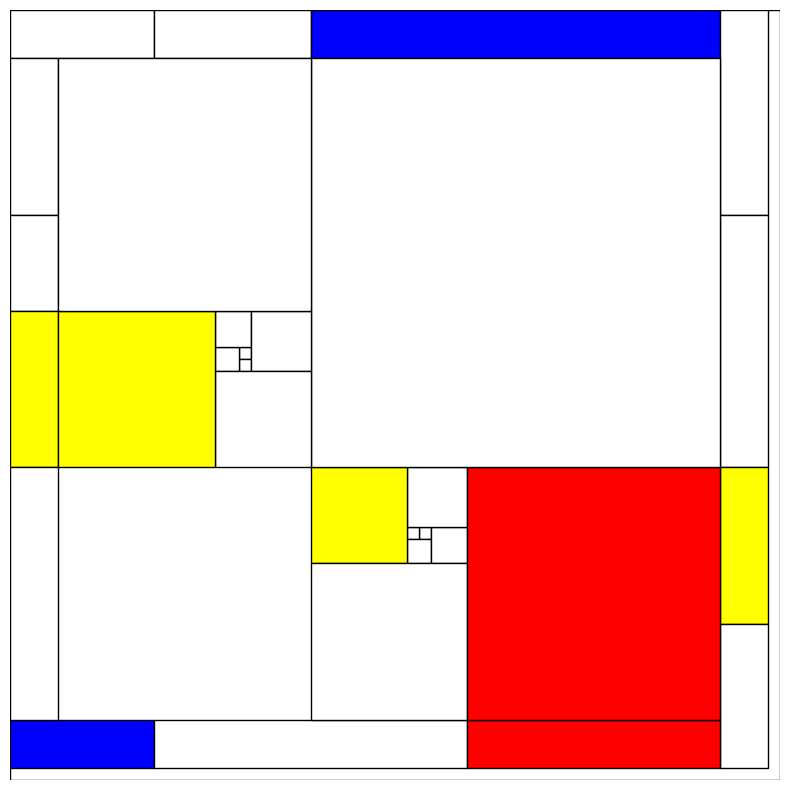

In [31]:
graphics = Graphics()
set_draw_utils(graphics)
fake_time = 0

fig, ax = plt.subplots(figsize=(10, 10))

offset_x = 4
offset_y = 4

duration = 90
fps = 5

def make_frame(t):
    time = t * fps
    minutes = time % 60
    hours = 12 + int(time / 60) % 24
    # clear
    ax.clear()

    ax.set_aspect('equal', 'box')
    ax.axis('off')
    # adjust x and y limits to zoom out
    ax.set_xlim([0, 64])
    ax.set_ylim([0, 64])

    ax.invert_yaxis()
     
    [hour, minute, second] = [hours, minutes, 0]
    draw_square(graphics, 0, 0, 64, 'white')
    draw_borders(graphics, second, offset_x, offset_y)
    draw_fibonacci(graphics, hour, minute, offset_x, offset_y)
    
    # returning numpy image
    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(make_frame, duration = duration / fps)
 
# displaying animation with auto play and looping
animation.ipython_display(fps = fps, loop = False, autoplay = True)